# Lorenz System of Differential Equations

In 1963, Edward Lorenz developed a mathematical model consisting of three, non-linear, ordinary differential equations to study atmospheric convection. Though the set of differential equations are *deterministic*, the Lorenz system is perhaps most noteworthy for exhibiting chaotic behavior. In other words, small perturbations in the initial conditions result in large variations in the dynamics of the system, what is often referred to in lay terms as the 'butterfly effect'.

The Lorenz system of differential equations are

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

Commonly used as an introduction to the interactive data visualization in Jupyter Notebooks, the following code is described in further detail [here](https://ipywidgets.readthedocs.io/en/stable/examples/Lorenz%20Differential%20Equations.html), [here](https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/), and [here](https://matplotlib.org/3.1.0/gallery/mplot3d/lorenz_attractor.html). For more information about the Lorenz system, refer to [Wikipedia](https://en.wikipedia.org/wiki/Lorenz_system).

Our interest in the Lorenz system is merely to state that chaotic behavior is an attribute of many non-linear, differential systems of equations. It is important to note that describing a system of equations as chaotic does not mean seeking solutions is intractable, it only means we must rely on statistics to describe events in  a more meaningful way. I mention this because as students of fluid mechanics, we may mistakenly think that modeling the turbulent nature of flows to be something *outside* of the ability of the Navier-Stokes equations. And yes, while finding **deterministic** solutions to Navier-Stokes equations is often *not* feasible (computationally), they certainly are *possible*.

In [1]:
%matplotlib inline

from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [2]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):
    """
    Solve the Lorenz system of equations and plot the trajectories.
    
    Args:
        N (int) : Number of trajectories to simulate. Starting points are 
            randomly selected from a uniform distribution [-15,15].
        angle (float) : View angle for visualization.
        max_time (float) : 
        sigma (float) :  Lorenz parameter proportional to the Prandtl number.
        beta (float) : Lorenz parameter proportional to the Rayleigh number.
        rho (float) : Lorenz parameter proportional to the scale of the convective layer.
    """
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.jet(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

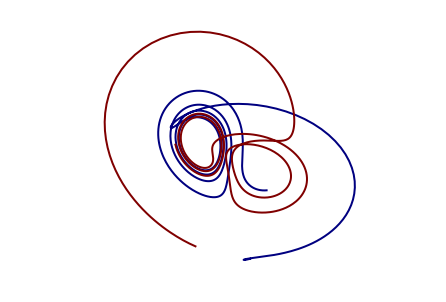

In [3]:
t, x_t = solve_lorenz(angle=0, N=2)

Near $\rho = 28$, $\sigma = 10$ and $\beta = 8/3$, the system exhibits chaotic behavior. Trajectories with values of $\rho$, $\sigma$, and $\beta$ near these will evolve significantly different with only small perturbations $(\approx 10^{-5})$ in initial position. Initially, the two trajectories will be coincident, but in time, they will diverge.

Using the interactive widget, you should be able to observe this. For values of $\rho < 1$, the solutions are stable.

In [4]:
w = interactive(solve_lorenz, angle=(0.,360.), N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

In [5]:
t, x_t = w.result

In [6]:
xyz_avg = x_t.mean(axis=1)

Text(0.5, 1.0, 'Average $y(t)$')

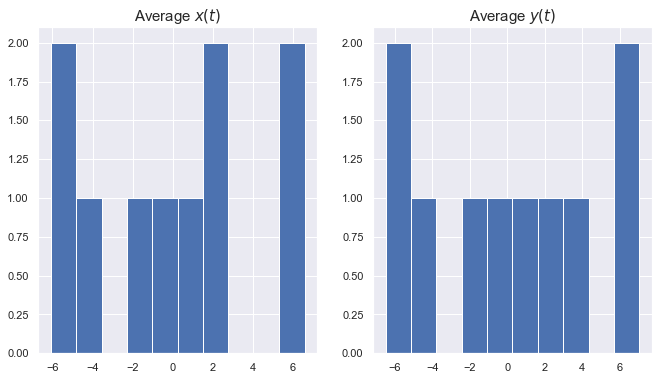

In [7]:
import seaborn as sns
sns.set()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

ax1.hist(xyz_avg[:,0])
ax1.set_title('Average $x(t)$', fontsize=15)

ax2.hist(xyz_avg[:,1])
ax2.set_title('Average $y(t)$', fontsize=15)